# Bayesian Models for Match Score Prediction

This notebook demonstrates how to use Bayesian models to predict match scores using the `ssat` library.

## Importing Libraries


In [1]:
import pandas as pd
from ssat.bayesian.predictive_models import Poisson, SkellamZero

## Understanding the Models

When a model is instantiated, it will print how the data should be parsed for STAN. The two models, Poisson and Zero Inflated Skellam, are different:

- **Poisson**: Predicts the total goals for each team.
- **Zero Inflated Skellam**: Predicts the spread difference between teams.

The difference is demonstrated in the plotted team stats and in the predictions, particularly in the probability of a draw.

## Preparing the Data

We will create a DataFrame containing the home and away teams.

In [2]:
matches = pd.DataFrame({
    "home_team": [
        "Czech Republic", "Estonia", "Greece", "Montenegro", "Turkey",
        "Luxembourg", "Faroe Islands", "North Macedonia", "Georgia", "Finland",
        "Austria", "Poland", "Serbia", "Latvia", "Kosovo", "Israel",
        "France", "Sweden",
    ],
    "away_team": [
        "Croatia", "Lithuania", "Iceland", "Hungary", "Switzerland",
        "Belgium", "Netherlands", "Slovenia", "Bosnia & Herzegovina", "Slovakia",
        "Germany", "Portugal", "Spain", "Italy", "Ukraine", "Romania",
        "Denmark", "Norway",
    ],
})

# Add index that is home_team vs away_team string
matches.index = matches.home_team + " vs " + matches.away_team

## Loading Historical Data

Next, we will load historical match data.

In [3]:
df = pd.read_pickle("ssat/data/handball_data.pkl")
df = df[["home_team", "away_team", "home_goals", "away_goals"]]

## Fitting Models

We will fit two Bayesian models: Poisson and SkellamZero.


Data requirements for poisson.stan:
--------------------------------------------------
Required columns (in order):
  Index columns (first columns):
    0. Home Team index <lower=1, upper=T>
    1. Away Team index <lower=1, upper=T>

  Data columns:
    2. Home Goals Obs (int)
    3. Away Goals Obs (int)

  Optional columns:
    4. Sample weights (float, optional)

Example usage:
  # Using a DataFrame:
  data = pd.DataFrame(your_data)  # columns must be in order shown above
  model.fit(data)

  # Using a numpy array:
  data = np.array(your_data)  # columns must be in order shown above
  model.fit(data)

Data requirements for skellam_zero.stan:
--------------------------------------------------
Required columns (in order):
  Index columns (first columns):
    0. Home Team index <lower=1, upper=T>
    1. Away Team index <lower=1, upper=T>

  Data columns:
    2. Home Goals Obs (int)
    3. Away Goals Obs (int)

  Optional columns:
    4. Sample weights (float, optional)

Example usage:


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

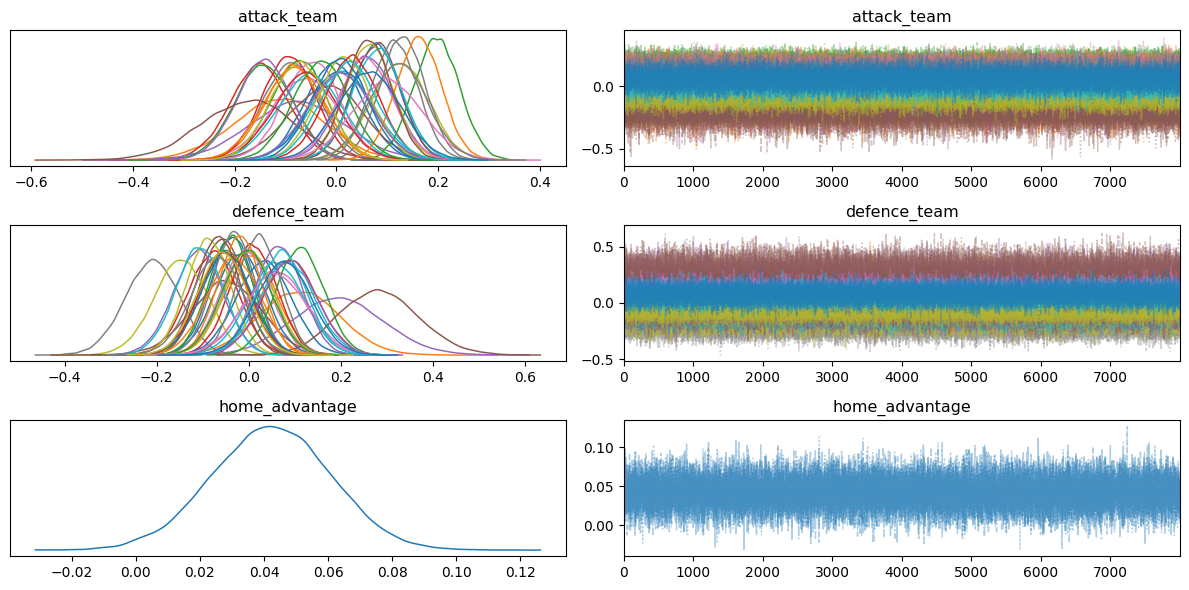

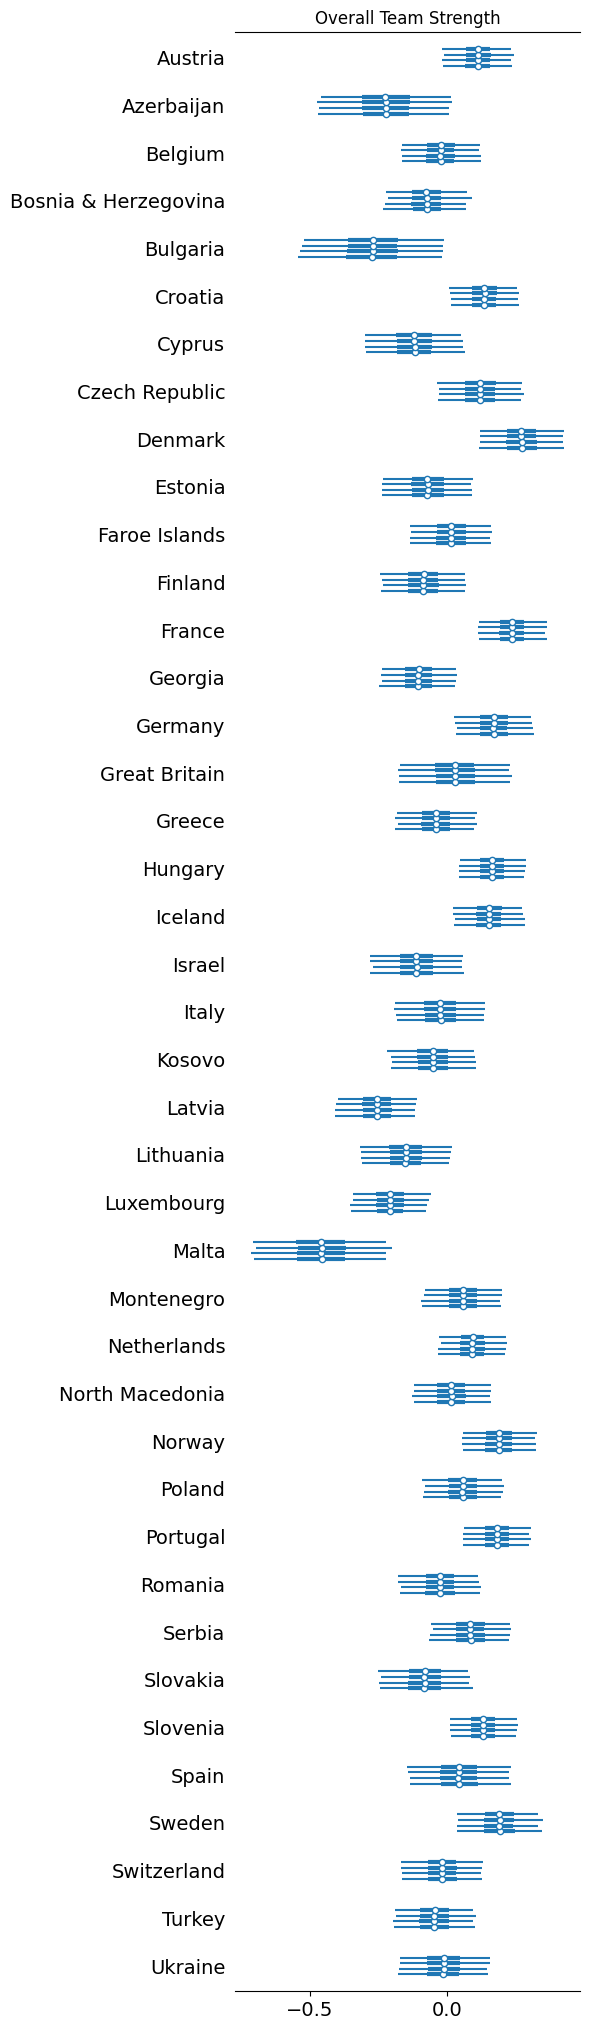

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

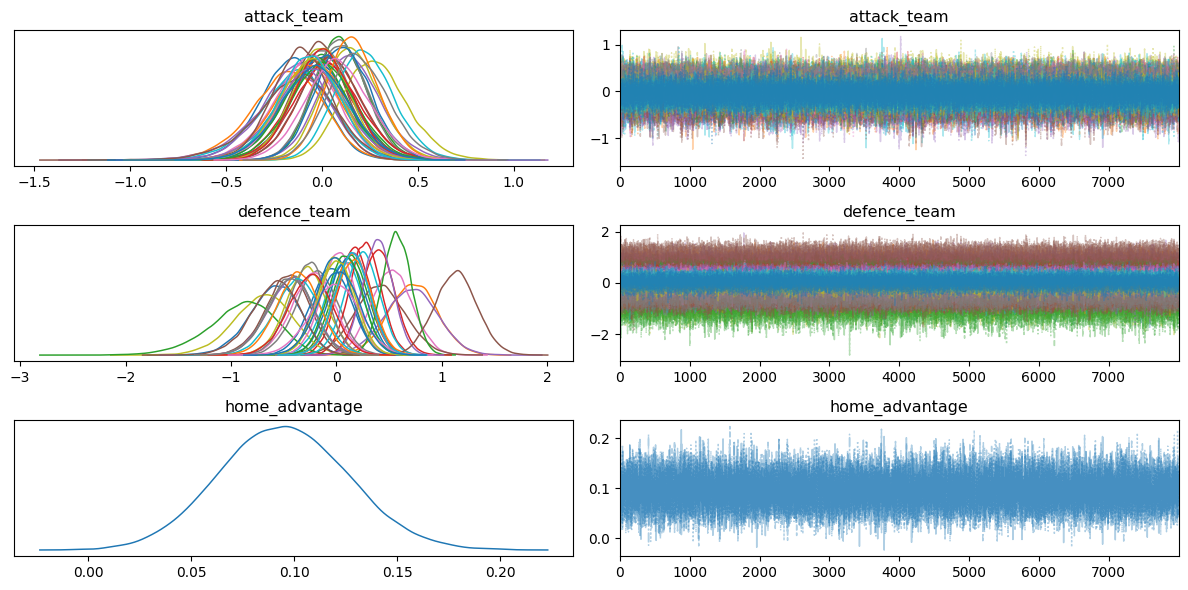

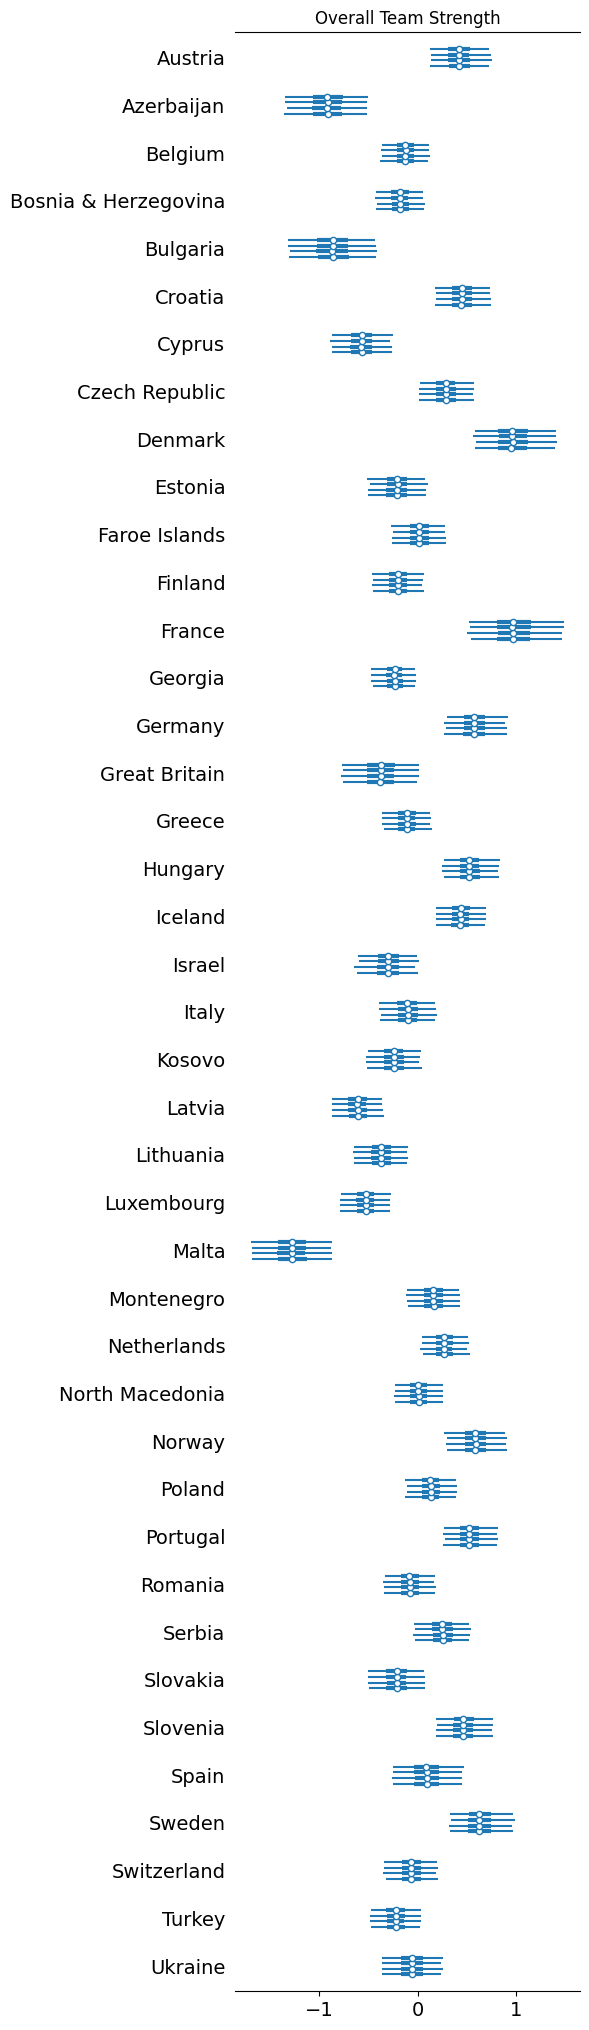

In [4]:
models = [Poisson(), SkellamZero()]
preds = []
probas = []

for model in models:
    model.fit(df)

    # Visualize results
    model.plot_trace()
    model.plot_team_stats()

    pred = model.predict(matches)
    preds.append(pred)
    proba = model.predict_proba(matches)
    probas.append(proba)

## Displaying Predictions

Finally, we will print the predictions from each model.

In [5]:
for i, model in enumerate(models):
    print(f"{model.__class__.__name__} predictions:")
    print(preds[i])
    print(1 / probas[i])

Poisson predictions:
                                 pred_home_goals_match  pred_away_goals_match
Czech Republic vs Croatia                         25.0                   24.0
Estonia vs Lithuania                              32.0                   29.0
Greece vs Iceland                                 25.0                   30.0
Montenegro vs Hungary                             30.0                   32.0
Turkey vs Switzerland                             28.0                   28.0
Luxembourg vs Belgium                             24.0                   28.0
Faroe Islands vs Netherlands                      30.0                   31.0
North Macedonia vs Slovenia                       28.0                   30.0
Georgia vs Bosnia & Herzegovina                   24.0                   24.0
Finland vs Slovakia                               29.0                   28.0
Austria vs Germany                                28.0                   29.0
Poland vs Portugal                         

## Conclusion

This notebook provides a basic introduction to using Bayesian models for predicting match scores. You can modify the data and models to explore further!